In [12]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [ ]:
estacoes = [f for f in os.listdir("estacoes12X") if f.endswith('.csv')]
print(estacoes)

print(len(estacoes))

#Remover os dias de abril
#for est in estacoes:
#    df = pd.read_csv(f"estacoes12X/{est}")
#    df = df.drop(df.index[:2])
#    df.to_csv(f"estacoes12X/{est}", index=False)


df = pd.read_csv("estacoes12X/fwi_ipma_0.csv")
print(len(df))
fwi = df["fwix"].iloc[0]

for h in range(0, 31):
    for est in estacoes:
        df = pd.read_csv(f"estacoes12X/{est}")
        fwi += df["fwix"].iloc[h]

    with open("fwi.txt", "a") as f:
        med_fwi = fwi / len(estacoes)
        hora = df["hourly.time"].iloc[h]
        f.write(f"{hora},{med_fwi}\n")

    fwi = 0

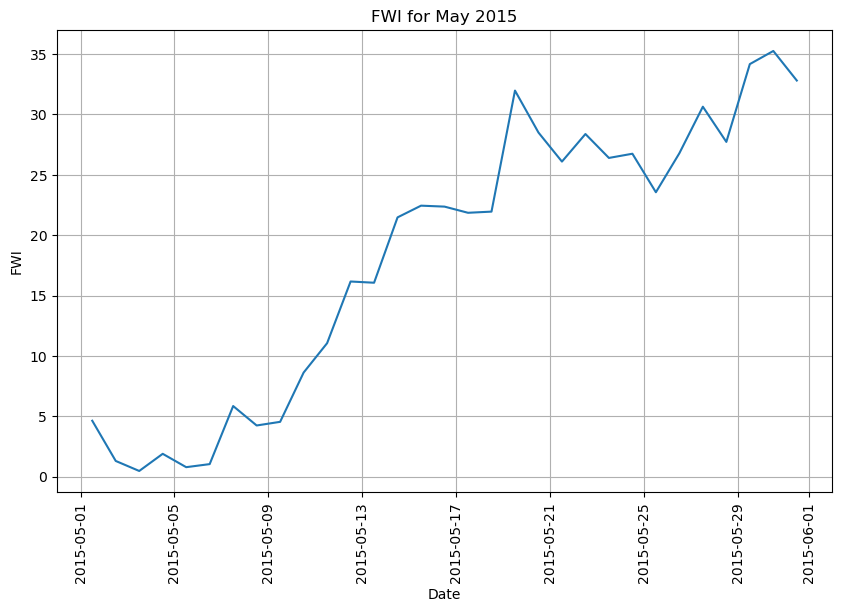

In [18]:
import matplotlib.pyplot as plt

# Initialize empty lists for dates and fwi values
dates = []
fwi_values = []

# Open the file and read the data
with open('fwi.txt', 'r') as f:
    for line in f:
        date, fwi = line.split(',')
        dates.append(pd.to_datetime(date))
        fwi_values.append(float(fwi))

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(dates, fwi_values)
plt.xlabel('Date')
plt.ylabel('FWI')
plt.title('FWI for May 2015')

plt.xticks(rotation=90)
plt.grid(True)
plt.savefig('fwi_plot.png', dpi=300, bbox_inches='tight')
plt.show()